In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt') 
automobile_df.head()
# Count the number of different values there are in a column 
automobile_df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [50]:
#automobile_df.count()
automobile_df = automobile_df.replace("?", np.nan)
automobile_df = automobile_df.dropna(how='all', axis=0)
automobile_df = automobile_df.dropna()

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['symboling', 'normalized-losses', 'engine-location', 'drive-wheels', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'num-of-cylinders']` from the data set as they will not be used in the analysis.

In [52]:
# Remove all the data that is unnessesary 
automobile_df = automobile_df.drop(columns=['symboling', 'normalized-losses', 'engine-location', 'drive-wheels',
                 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'num-of-cylinders', 'curb-weight'])

# Lets see how our data looks now
automobile_df.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,height,engine-type,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,88.6,168.8,64.1,48.8,dohc,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,88.6,168.8,64.1,48.8,dohc,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,94.5,171.2,65.5,52.4,ohcv,154,5000,19,26,16500
3,audi,gas,std,four,sedan,99.8,176.6,66.2,54.3,ohc,102,5500,24,30,13950
4,audi,gas,std,four,sedan,99.4,176.6,66.4,54.3,ohc,115,5500,18,22,17450
5,audi,gas,std,two,sedan,99.8,177.3,66.3,53.1,ohc,110,5500,19,25,15250
6,audi,gas,std,four,sedan,105.8,192.7,71.4,55.7,ohc,110,5500,19,25,17710
7,audi,gas,std,four,wagon,105.8,192.7,71.4,55.7,ohc,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,105.8,192.7,71.4,55.9,ohc,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,101.2,176.8,64.8,54.3,ohc,101,5800,23,29,16430


#### Remove any duplicate rows

In [25]:
# Drop the duplicates 
automobile_df = automobile_df.drop_duplicates()

In [29]:
# Check the data types
automobile_df.dtypes

make             object
fuel-type        object
aspiration       object
num-of-doors     object
body-style       object
wheel-base      float64
length          float64
width           float64
height          float64
engine-type      object
horsepower       object
peak-rpm         object
city-mpg          int64
highway-mpg       int64
price            object
dtype: object

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [67]:
# Change the horsepower and the peak-rpm colomns into integers
automobile_df['horsepower'] = automobile_df['horsepower'].astype(np.int64)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype(np.int64)
# Convert the body-style colomn into a string datatype
automobile_df['body-style'] = automobile_df['body-style'].astype(str)

### Finding Certain Engine types
Locate all cars with "dohc" engine type. 

In [31]:
# Create a dataframe with all the movies in the "Action" genre
dohc_df = automobile_df[automobile_df['engine-type']== "dohc"]

# Display the first few rows of the Action movies DataFrame
print(dohc_df.head())

            make fuel-type aspiration num-of-doors   body-style  wheel-base  \
0    alfa-romero       gas        std          two  convertible        88.6   
1    alfa-romero       gas        std          two  convertible        88.6   
47        jaguar       gas        std         four        sedan       113.0   
48        jaguar       gas        std         four        sedan       113.0   
136         saab       gas      turbo          two    hatchback        99.1   

     length  width  height engine-type horsepower peak-rpm  city-mpg  \
0     168.8   64.1    48.8        dohc        111     5000        21   
1     168.8   64.1    48.8        dohc        111     5000        21   
47    199.6   69.6    52.8        dohc        176     4750        15   
48    199.6   69.6    52.8        dohc        176     4750        15   
136   186.6   66.5    56.1        dohc        160     5500        19   

     highway-mpg  price  
0             27  13495  
1             27  16500  
47            

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 

How do the most expensive and cheapest movies compare? Exploring the most expensive cars and finding out whether there is a link between engine type and the expensive cars.

In [47]:
# Code here
top_5 = automobile_df.sort_values(by=['price']).tail(5)
top_5
# What we see is that if a car has ohc engine-type it most likely to be expensive so if someone
# a company wants to build an expensive car they should start by getting the ohc model
lowest_5 = automobile_df.sort_values(by=['price']).head(5)
lowest_5
# We see that the 5 most expensive cars are all Japanese car which is an indication that making a car in Japan
# may be cheaper than all the other countries in our list 

,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,height,engine-type,horsepower,peak-rpm,city-mpg,highway-mpg,price
147,subaru,gas,std,four,wagon,97.0,173.5,65.4,53.0,ohcf,94,5200,25,31,10198
62,mazda,gas,std,four,sedan,98.8,177.8,66.5,55.5,ohc,84,4800,26,32,10245
40,honda,gas,std,four,sedan,96.5,175.4,62.5,54.1,ohc,86,5800,27,33,10295
42,honda,gas,std,two,sedan,96.5,169.1,66.0,51.0,ohc,100,5500,25,31,10345
61,mazda,gas,std,two,hatchback,98.8,177.8,66.5,53.7,ohc,84,4800,26,32,10595


#### What is the difference in the mpg in the city and on the highway? 

Compare the most and least difference in the mpg. The comparison helps us identify the different approaches to building the car would be the reason to the difference. Subtracting the city-mpg from the high-mpg generated, will return the difference.

In [55]:
# Code here
# Get the difference between the mpg in the city and on the highway and place 
# this difference in dataframe 
automobile_df['mpg_diff'] = automobile_df['highway-mpg'] - automobile_df['city-mpg']

# Find out the max and min values and then print them out 
min_index = automobile_df['mpg_diff'].idxmin()
max_index = automobile_df['mpg_diff'].idxmax()
automobile_df.iloc[min_index]
automobile_df.iloc[max_index]

# We see that the vechile with the lowest difference in the mpg difference and it has 
# has horsepower of 97 and a peak rpm of 5000. Then we see that the car with the highest difference
# is a toyota with a horsepower of 116 and a rpm of 4800, we see that there is a direct proportion
# between the difference in the mpg and horsepower.

make             toyota
fuel-type           gas
aspiration          std
num-of-doors        two
body-style      hardtop
wheel-base         98.4
length            176.2
width              65.6
height             52.0
engine-type         ohc
horsepower          116
peak-rpm           4800
city-mpg             24
highway-mpg          30
price              8449
mpg_diff              6
Name: 167, dtype: object

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [56]:
# Code here
# Rearrange the dataframe according to the price
automobile_df.sort_values('price')

,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,height,engine-type,horsepower,peak-rpm,city-mpg,highway-mpg,price,mpg_diff
147,subaru,gas,std,four,wagon,97.0,173.5,65.4,53.0,ohcf,94,5200,25,31,10198,6
62,mazda,gas,std,four,sedan,98.8,177.8,66.5,55.5,ohc,84,4800,26,32,10245,6
40,honda,gas,std,four,sedan,96.5,175.4,62.5,54.1,ohc,86,5800,27,33,10295,6
42,honda,gas,std,two,sedan,96.5,169.1,66.0,51.0,ohc,100,5500,25,31,10345,6
61,mazda,gas,std,two,hatchback,98.8,177.8,66.5,53.7,ohc,84,4800,26,32,10595,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,subaru,gas,std,four,sedan,97.2,172.0,65.4,52.5,ohcf,94,5200,26,32,9960,6
190,volkswagen,gas,std,two,hatchback,94.5,165.7,64.0,51.4,ohc,90,5500,24,29,9980,5
175,toyota,gas,std,four,hatchback,102.4,175.6,66.5,53.9,ohc,92,4200,27,32,9988,5
169,toyota,gas,std,two,hatchback,98.4,176.2,65.6,52.0,ohc,116,4800,24,30,9989,6


#### Find cars which have horsepower that is above 120

In [62]:
# Code here
over_160_horsepower = automobile_df[automobile_df.horsepower > 160]
over_160_horsepower

,make,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,height,engine-type,horsepower,peak-rpm,city-mpg,highway-mpg,price,mpg_diff
15,bmw,gas,std,four,sedan,103.5,189.0,66.9,55.7,ohc,182,5400,16,22,30760,6
16,bmw,gas,std,two,sedan,103.5,193.8,67.9,53.7,ohc,182,5400,16,22,41315,6
17,bmw,gas,std,four,sedan,110.0,197.0,70.9,56.3,ohc,182,5400,15,20,36880,5
47,jaguar,gas,std,four,sedan,113.0,199.6,69.6,52.8,dohc,176,4750,15,19,32250,4
48,jaguar,gas,std,four,sedan,113.0,199.6,69.6,52.8,dohc,176,4750,15,19,35550,4
49,jaguar,gas,std,two,sedan,102.0,191.7,70.6,47.8,ohcv,262,5000,13,17,36000,4
73,mercedes-benz,gas,std,four,sedan,120.9,208.1,71.7,56.7,ohcv,184,4500,14,16,40960,2
74,mercedes-benz,gas,std,two,hardtop,112.0,199.2,72.0,55.4,ohcv,184,4500,14,16,45400,2
75,mercury,gas,turbo,two,hatchback,102.7,178.4,68.0,54.8,ohc,175,5000,19,24,16503,5
105,nissan,gas,turbo,two,hatchback,91.3,170.7,67.9,49.7,ohcv,200,5200,17,23,19699,6


#### Most manufactured cars  
Create a bar plot explaining the frequency of each body style of car in the dataset.

C:\Users\mphon\AppData\Local\Temp\ipykernel_2936\2576286702.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  list = [['Sedan', sedan[0][0]], ['Hardtop', hardtop[0][0]],
C:\Users\mphon\AppData\Local\Temp\ipykernel_2936\2576286702.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ['hatchback', hatchback[0][0]], ['Wagon', wagon[0][0]],
C:\Users\mphon\AppData\Local\Temp\ipykernel_2936\2576286702.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

<Axes: xlabel='Frequency', ylabel='Body-style'>

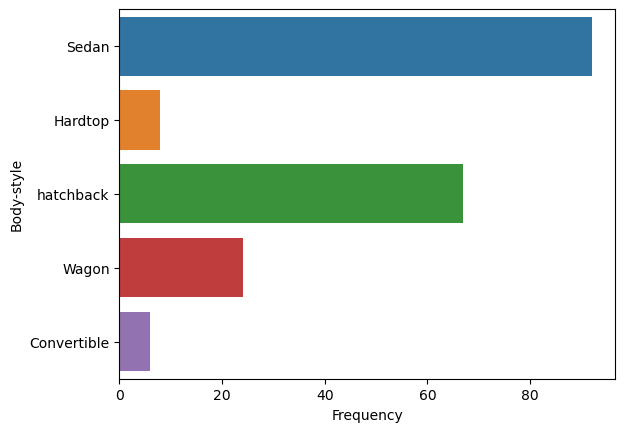

In [83]:
# Code here
# Get the count for all the movies
sedan = pd.DataFrame(automobile_df[automobile_df['body-style'].str.contains('sedan')].count())
hardtop = pd.DataFrame(automobile_df[automobile_df['body-style'].str.contains('hardtop')].count())
hatchback = pd.DataFrame(automobile_df[automobile_df['body-style'].str.contains('hatchback')].count())
wagon = pd.DataFrame(automobile_df[automobile_df['body-style'].str.contains('wagon')].count())
convertible = pd.DataFrame(automobile_df[automobile_df['body-style'].str.contains('convertible')].count())
# Create a list 
list = [['Sedan', sedan[0][0]], ['Hardtop', hardtop[0][0]],
        ['hatchback', hatchback[0][0]], ['Wagon', wagon[0][0]],
        ['Convertible', convertible[0][0]]]
# Create dataframe to be used in the barplot
df = pd.DataFrame(list, columns=['Body-style', 'Frequency'])
# Create the barplot
sns.barplot(df, x="Frequency", y="Body-style")

'''From the barplot it is clear that the sedan body-style is the most bought among cars in our dataset'''

C:\Users\mphon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mphon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


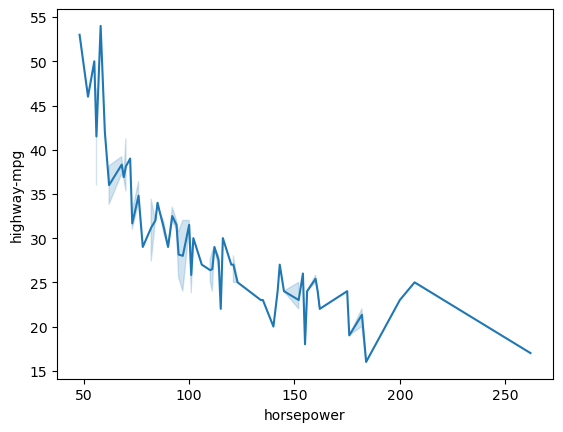

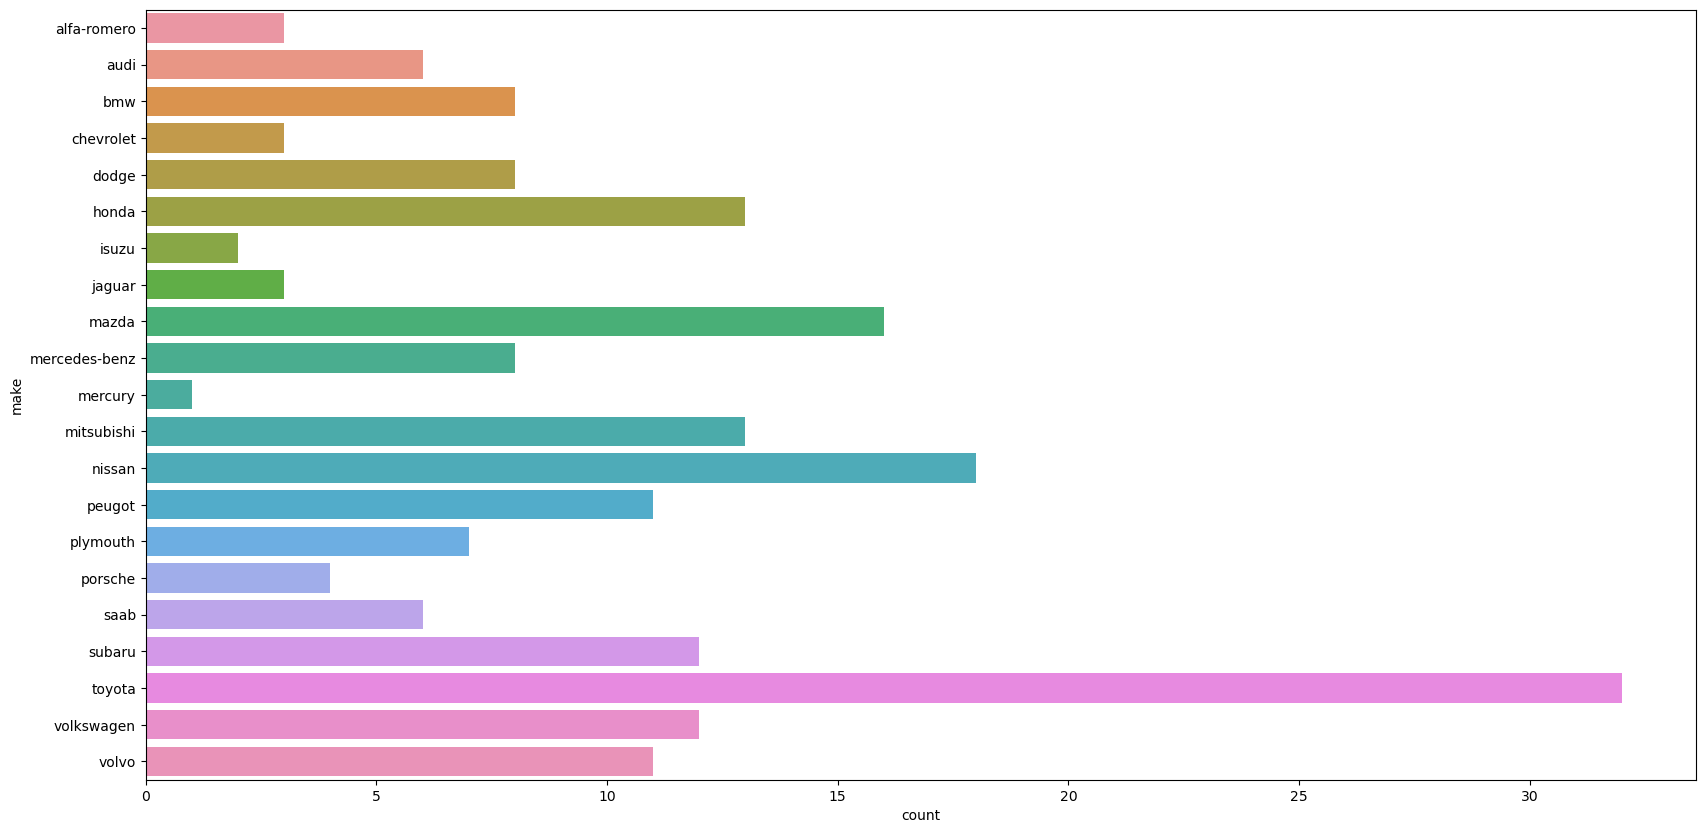

In [93]:
# Generate three different interesting visualisations with a data story.
# Lets find out the link between the budget and the revenue 
plt.figure()
sns.lineplot(x='horsepower', y='highway-mpg', data=automobile_df)
plt.show()
plt.close()
# From the overall trend of the link between horsepower and highway-mpg we can see that 
# there is an indirect relationship meaning if one wants to buy a car that is low on fuel
# they need to buy a car that has lower horsepower

# Lets now look at the link between wheelbase and horsepower
plt.figure()
plt.scatter(automobile_df['wheel-base'], automobile_df['horsepower'])
plt.xlabel("Wheelbase")
plt.ylabel('horsepower')
plt.show()
plt.close()
# From the scatterplot we see that there is a weak positive correlation 
# between the wheelbase and horsepower so no accurate decisions can be 
# made from this data visualisation

# Lets look at the link between the link betweem the vote average and vote count
fig = plt.figure(figsize=(20,10))
sns.countplot(y=automobile_df['make'], data=automobile_df);
# From this count plot we can clearly see that toyota is the most prevelent 
# in the dataset.